In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from skimage import img_as_float
from skimage import exposure
from scipy import signal
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    # Преобразование изображения в формат с плавающей запятой двойной точности
    #image = img_as_float(image)
    ax_img, ax_hist = axes
    # Создайте новые оси с невидимой осью X и независимой осью Y.
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)

    # Display histogram
    ax_hist.hist(image.flatten(), bins=bins,range= (0, 256), histtype='step', color='black')
    #ax_hist.set_xlabel('Pixel intensity',fontsize=25)
    ax_hist.tick_params(axis="x", labelsize=20)
    ax_hist.tick_params(axis="y", labelsize=20)
    
    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf

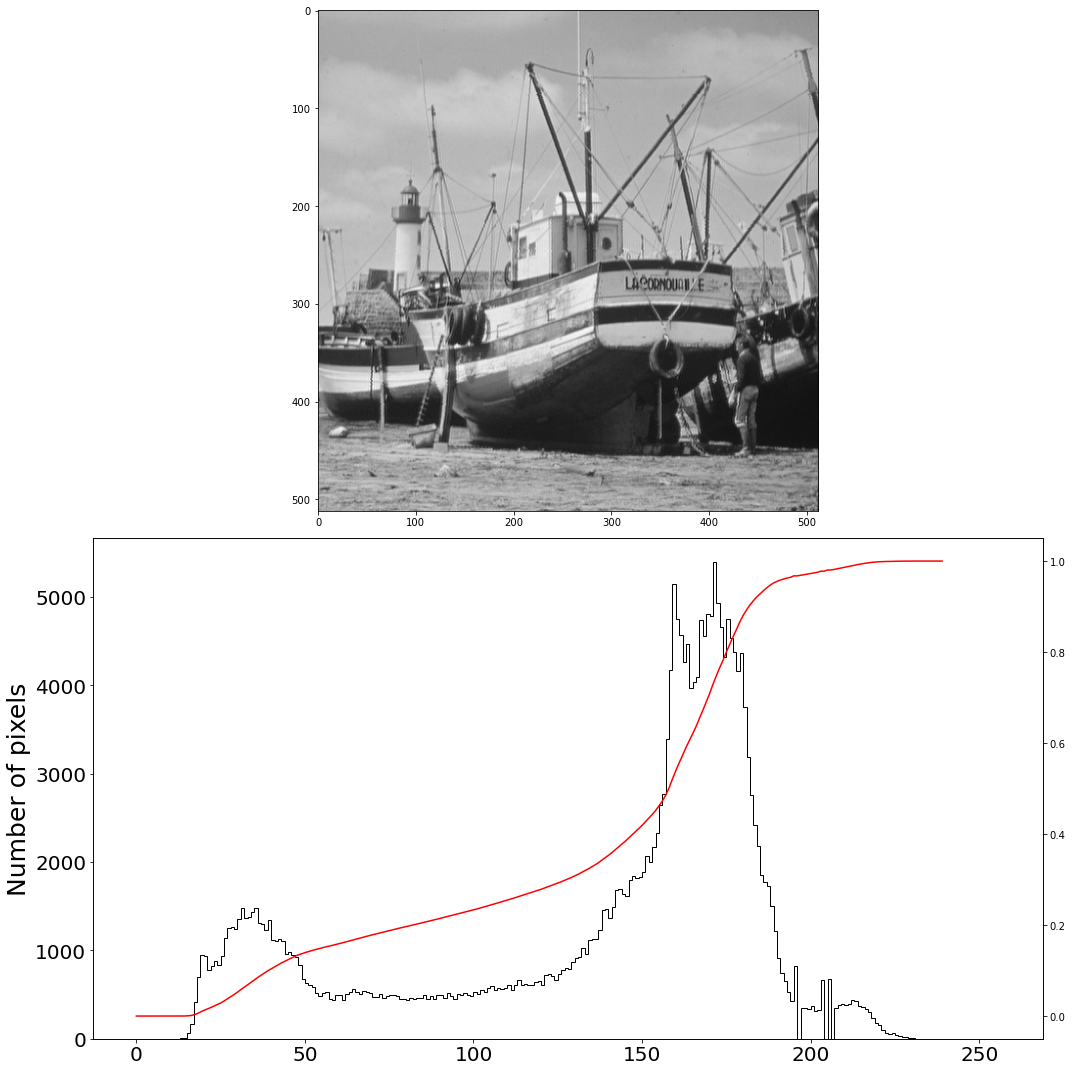

In [2]:
# img = plt.imread('01_apc.tif')
img = plt.imread('04_boat.tif')
fig = plt.figure(figsize=(15, 15))
axes=np.zeros((2,1),dtype=object)
axes[0,0]=fig.add_subplot(211)
axes[1,0]=fig.add_subplot(212)

ax_img, ax_hist, ax_cdf=plot_img_and_hist(img,axes[:,0])
ax_hist.set_ylabel('Number of pixels',fontsize=25)


# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

# Метод простого градиента

In [3]:
# определили маски
mask_u=np.array([[-1],[1]])
mask_v=np.array([[-1,1]])
# свернули исходное изображение с масками
derivative_u=signal.convolve2d(img,mask_u,mode="same")
derivative_v=signal.convolve2d(img,mask_v,mode="same")
print(derivative_u.shape,derivative_v.shape)
derivative_u

(512, 512) (512, 512)


array([[-166, -162, -166, ..., -135, -136, -131],
       [   0,   -3,   -1, ...,    2,    2,   -5],
       [   0,    2,    0, ...,   -2,    4,   -2],
       ...,
       [   8,   10,    0, ...,    7,   11,   35],
       [   7,    9,    7, ...,   44,    8,    4],
       [ -25,  -14,  -14, ...,  -14,  -13,   57]])

In [4]:
derivative_v

array([[-166,    4,   -4, ...,   -1,   -1,    5],
       [-166,    1,   -2, ...,    0,   -1,   -2],
       [-166,    3,   -4, ...,   -2,    5,   -8],
       ...,
       [-138,  -10,   -1, ...,    0,   56,   23],
       [-131,   -8,   -3, ...,   12,   20,   19],
       [-156,    3,   -3, ...,   14,   21,   89]])

In [5]:
# возвели все значения в квадрат
u=derivative_u**2
v=derivative_v**2
u

array([[27556, 26244, 27556, ..., 18225, 18496, 17161],
       [    0,     9,     1, ...,     4,     4,    25],
       [    0,     4,     0, ...,     4,    16,     4],
       ...,
       [   64,   100,     0, ...,    49,   121,  1225],
       [   49,    81,    49, ...,  1936,    64,    16],
       [  625,   196,   196, ...,   196,   169,  3249]], dtype=int32)

In [6]:
v

array([[27556,    16,    16, ...,     1,     1,    25],
       [27556,     1,     4, ...,     0,     1,     4],
       [27556,     9,    16, ...,     4,    25,    64],
       ...,
       [19044,   100,     1, ...,     0,  3136,   529],
       [17161,    64,     9, ...,   144,   400,   361],
       [24336,     9,     9, ...,   196,   441,  7921]], dtype=int32)

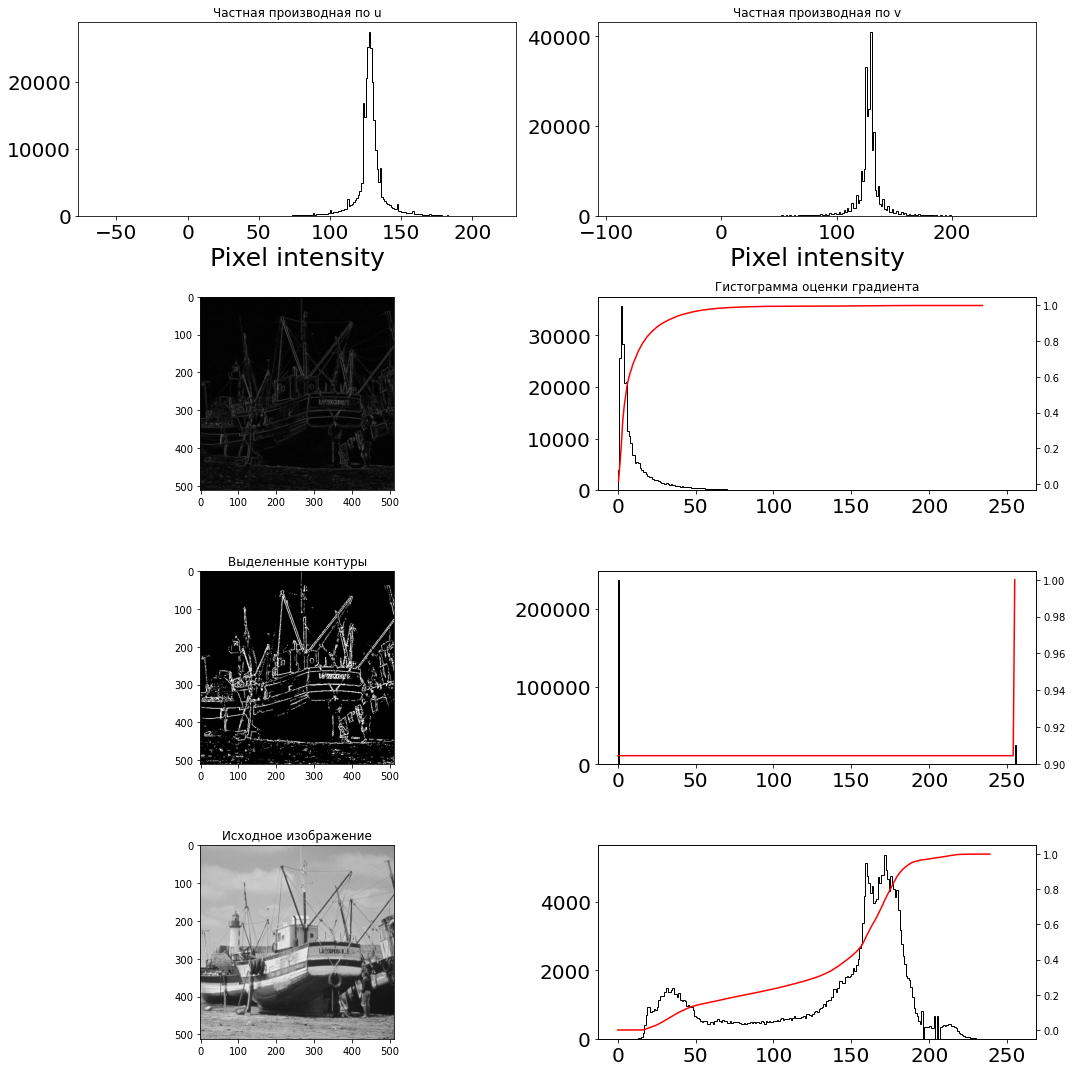

In [7]:
# расчитали модуль вектора градиента
img_with_contours_before_bound=np.sqrt(u+v)
# применили пороговую обработку
img_with_contours_after_bound=((img_with_contours_before_bound>30)*255).astype(np.uint8)

fig = plt.figure(figsize=(15, 15))
axes=np.zeros((4,2),dtype=object)
axes[0,0]=fig.add_subplot(421)
axes[0,1]=fig.add_subplot(422)
axes[1,0]=fig.add_subplot(423)
axes[1,1]=fig.add_subplot(424)
axes[2,0]=fig.add_subplot(425)
axes[2,1]=fig.add_subplot(426)
axes[3,0]=fig.add_subplot(427)
axes[3,1]=fig.add_subplot(428)

u_hist, v_hist = axes[0,:]

# Display histogram
u_hist.hist((derivative_u+128).flatten(), bins=256, histtype='step', color='black')
u_hist.set_xlabel('Pixel intensity',fontsize=25)
u_hist.tick_params(axis="x", labelsize=20)
u_hist.tick_params(axis="y", labelsize=20)
u_hist.set_title("Частная производная по u")

v_hist.hist((derivative_v+128).flatten(), bins=256, histtype='step', color='black')
v_hist.set_xlabel('Pixel intensity',fontsize=25)
v_hist.tick_params(axis="x", labelsize=20)
v_hist.tick_params(axis="y", labelsize=20)
v_hist.set_title("Частная производная по v")



ax_img, ax_hist, ax_cdf=plot_img_and_hist(img_with_contours_before_bound,axes[1,:])
ax_hist.set_title("Гистограмма оценки градиента")
ax_img, ax_hist, ax_cdf=plot_img_and_hist(img_with_contours_after_bound,axes[2,:])
ax_img.set_title("Выделенные контуры")

ax_img, ax_hist, ax_cdf=plot_img_and_hist(img,axes[3,:])
ax_img.set_title("Исходное изображение")

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

# Метод аппроксимации лапласиана (маски (20))

In [8]:
# определили маску
mask=np.array([[0,1,0],[1,-4,1],[0,1,0]])
# свернули исходное изображение с маской
derivative=signal.convolve2d(img,mask_u,mode="same")
print(derivative.shape)
derivative

(512, 512)


array([[-166, -162, -166, ..., -135, -136, -131],
       [   0,   -3,   -1, ...,    2,    2,   -5],
       [   0,    2,    0, ...,   -2,    4,   -2],
       ...,
       [   8,   10,    0, ...,    7,   11,   35],
       [   7,    9,    7, ...,   44,    8,    4],
       [ -25,  -14,  -14, ...,  -14,  -13,   57]])

In [9]:
# # приводим к диапазону 0 - 255
derivative=np.abs(derivative)

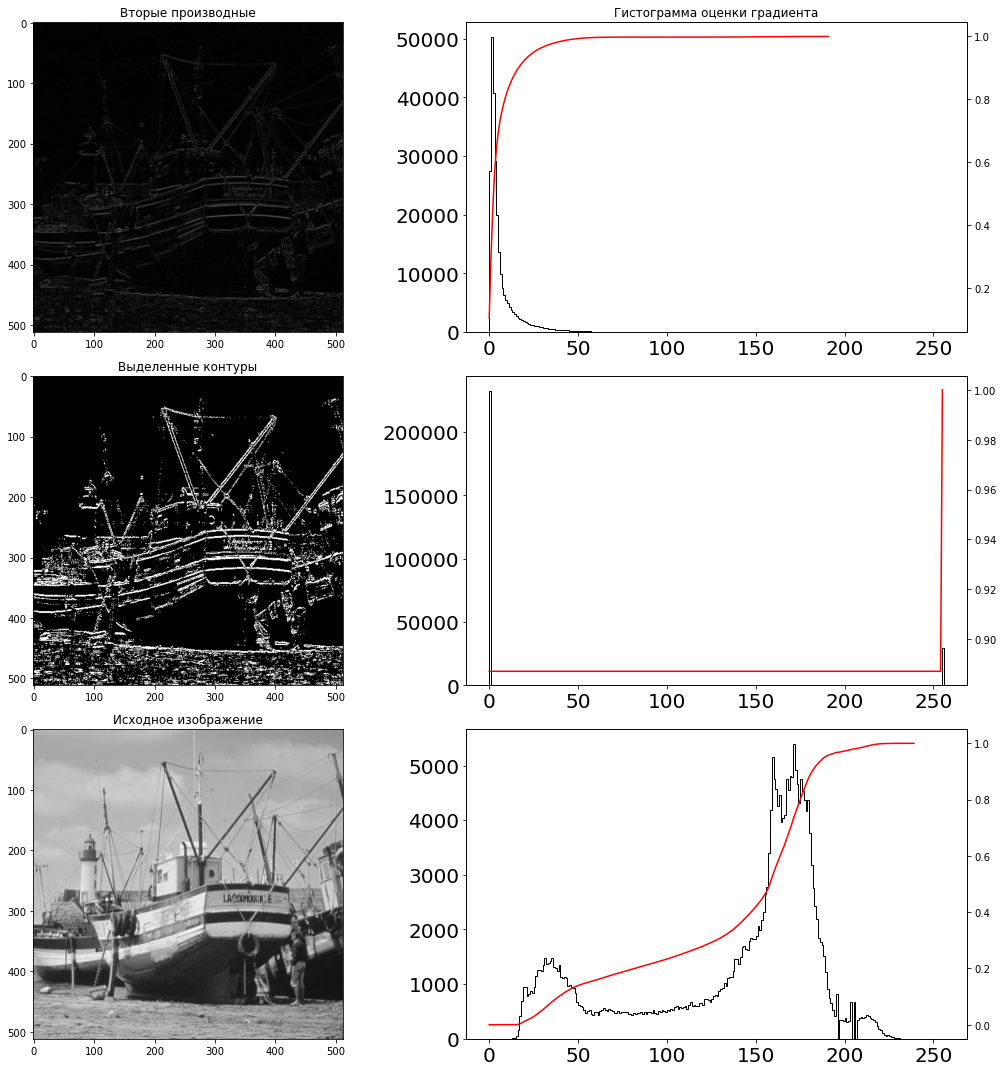

In [10]:
# применили пороговую обработку
img_with_contours_after_bound=((derivative>15)*255).astype(np.uint8)

fig = plt.figure(figsize=(15, 15))
axes=np.zeros((3,2),dtype=object)
axes[0,0]=fig.add_subplot(321)
axes[0,1]=fig.add_subplot(322)
axes[1,0]=fig.add_subplot(323)
axes[1,1]=fig.add_subplot(324)
axes[2,0]=fig.add_subplot(325)
axes[2,1]=fig.add_subplot(326)





ax_img, ax_hist, ax_cdf=plot_img_and_hist(derivative.astype(np.uint8),axes[0,:])
ax_img.set_title("Вторые производные")
ax_hist.set_title("Гистограмма оценки градиента")
ax_img, ax_hist, ax_cdf=plot_img_and_hist(img_with_contours_after_bound,axes[1,:])
ax_img.set_title("Выделенные контуры")

ax_img, ax_hist, ax_cdf=plot_img_and_hist(img,axes[2,:])
ax_img.set_title("Исходное изображение")

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

# Метод оператора Прюитт (маски (25))

In [11]:
# определили маски
s1=np.array([[-1,-1,-1],[0,0,0],[1,1,1]])*(1/6)
s2=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])*(1/6)

# свернули исходное изображение с масками
derivative_u=signal.convolve2d(img,s1,mode="same").astype(np.uint8)
derivative_v=signal.convolve2d(img,s2,mode="same").astype(np.uint8)
print(derivative_u.shape,derivative_v.shape)
derivative_u

(512, 512) (512, 512)


array([[201, 173, 173, ..., 190, 189, 211],
       [  0,   0,   0, ...,   1,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  5,   6,   6, ...,  17,  18,   9],
       [253, 251, 255, ...,   6,  14,   9],
       [ 45,  68,  71, ...,  46,  38,  22]], dtype=uint8)

In [12]:
derivative_v

array([[202,   0,   0, ...,   0,   0,  45],
       [175,   0, 255, ...,   0,   0,  66],
       [174,   0,   0, ...,   0, 255,  66],
       ...,
       [182, 252, 254, ...,  22,  28,  42],
       [183, 253, 253, ...,  20,  38,  41],
       [208, 255, 255, ...,  11,  24,  27]], dtype=uint8)

In [13]:
# возвели все значения в квадрат
u=derivative_u**2
v=derivative_v**2
u

array([[209, 233, 233, ...,   4, 137, 233],
       [  0,   0,   0, ...,   1,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [ 25,  36,  36, ...,  33,  68,  81],
       [  9,  25,   1, ...,  36, 196,  81],
       [233,  16, 177, ...,  68, 164, 228]], dtype=uint8)

In [14]:
v

array([[100,   0,   0, ...,   0,   0, 233],
       [161,   0,   1, ...,   0,   0,   4],
       [ 68,   0,   0, ...,   0,   1,   4],
       ...,
       [100,  16,   4, ..., 228,  16, 228],
       [209,   9,   9, ..., 144, 164, 145],
       [  0,   1,   1, ..., 121,  64, 217]], dtype=uint8)

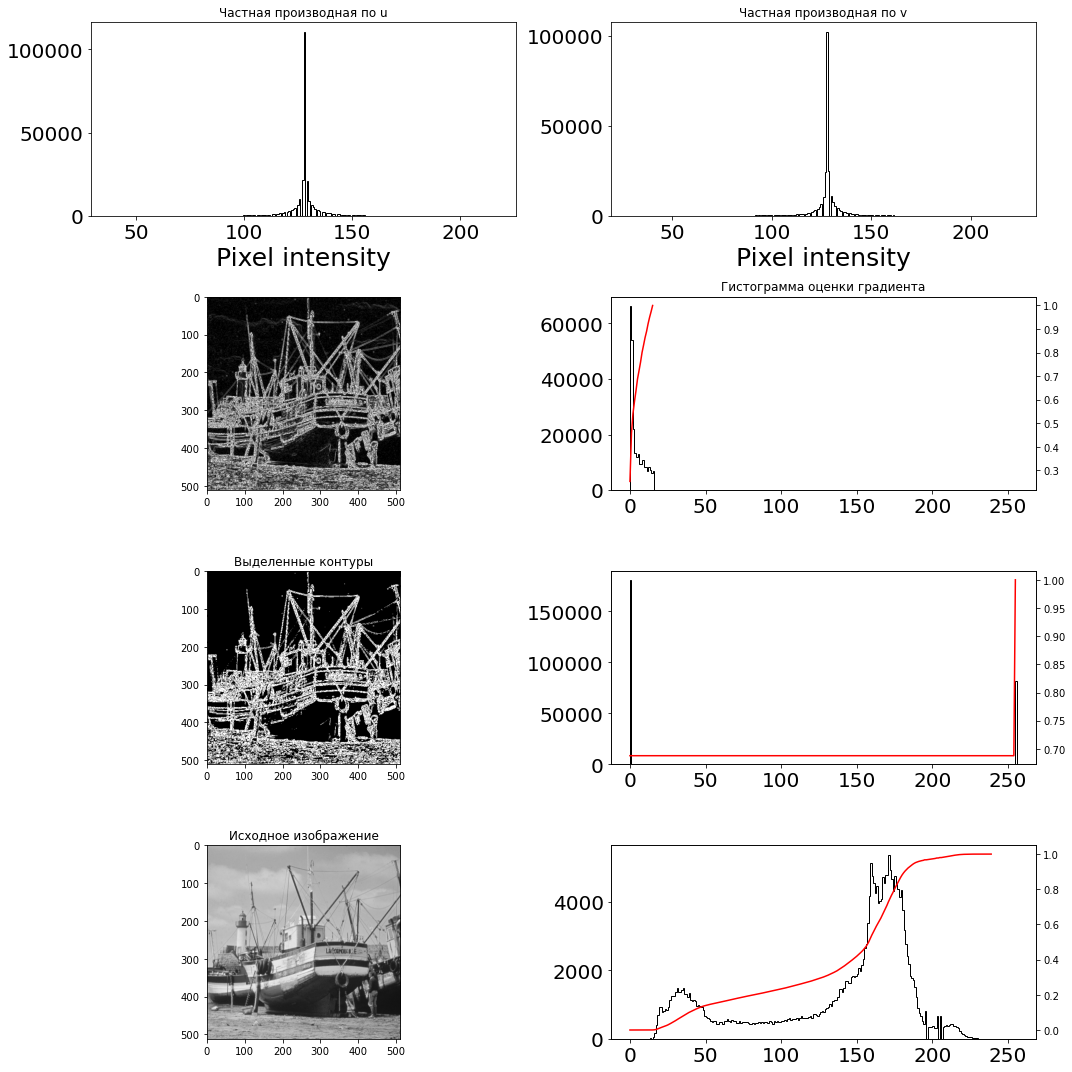

In [15]:
# расчитали модуль вектора градиента
img_with_contours_before_bound=np.sqrt(u+v).astype(np.uint8)
# применили пороговую обработку
img_with_contours_after_bound=((img_with_contours_before_bound>5)*255).astype(np.uint8)

fig = plt.figure(figsize=(15, 15))
axes=np.zeros((4,2),dtype=object)
axes[0,0]=fig.add_subplot(421)
axes[0,1]=fig.add_subplot(422)
axes[1,0]=fig.add_subplot(423)
axes[1,1]=fig.add_subplot(424)
axes[2,0]=fig.add_subplot(425)
axes[2,1]=fig.add_subplot(426)
axes[3,0]=fig.add_subplot(427)
axes[3,1]=fig.add_subplot(428)

u_hist, v_hist = axes[0,:]

# Display histogram
u_hist.hist((derivative_u+128).flatten(), bins=256, histtype='step', color='black')
u_hist.set_xlabel('Pixel intensity',fontsize=25)
u_hist.tick_params(axis="x", labelsize=20)
u_hist.tick_params(axis="y", labelsize=20)
u_hist.set_title("Частная производная по u")

v_hist.hist((derivative_v+128).flatten(), bins=256, histtype='step', color='black')
v_hist.set_xlabel('Pixel intensity',fontsize=25)
v_hist.tick_params(axis="x", labelsize=20)
v_hist.tick_params(axis="y", labelsize=20)
v_hist.set_title("Частная производная по v")


ax_img, ax_hist, ax_cdf=plot_img_and_hist(img_with_contours_before_bound,axes[1,:])
ax_hist.set_title("Гистограмма оценки градиента")
ax_img, ax_hist, ax_cdf=plot_img_and_hist(img_with_contours_after_bound,axes[2,:])
ax_img.set_title("Выделенные контуры")

ax_img, ax_hist, ax_cdf=plot_img_and_hist(img,axes[3,:])
ax_img.set_title("Исходное изображение")

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

# Метод согласования для лапласиана (маска (27));

In [16]:
# определили маску
mask=np.array([[2,-1,2],[-1,-4,-1],[2,-1,2]])*(1/3)
# свернули исходное изображение с маской
derivative=signal.convolve2d(img,mask_u,mode="same")
print(derivative.shape)
derivative

(512, 512)


array([[-166, -162, -166, ..., -135, -136, -131],
       [   0,   -3,   -1, ...,    2,    2,   -5],
       [   0,    2,    0, ...,   -2,    4,   -2],
       ...,
       [   8,   10,    0, ...,    7,   11,   35],
       [   7,    9,    7, ...,   44,    8,    4],
       [ -25,  -14,  -14, ...,  -14,  -13,   57]])

In [17]:
# приводим к диапазону 0 - 255
derivative=np.abs(derivative)

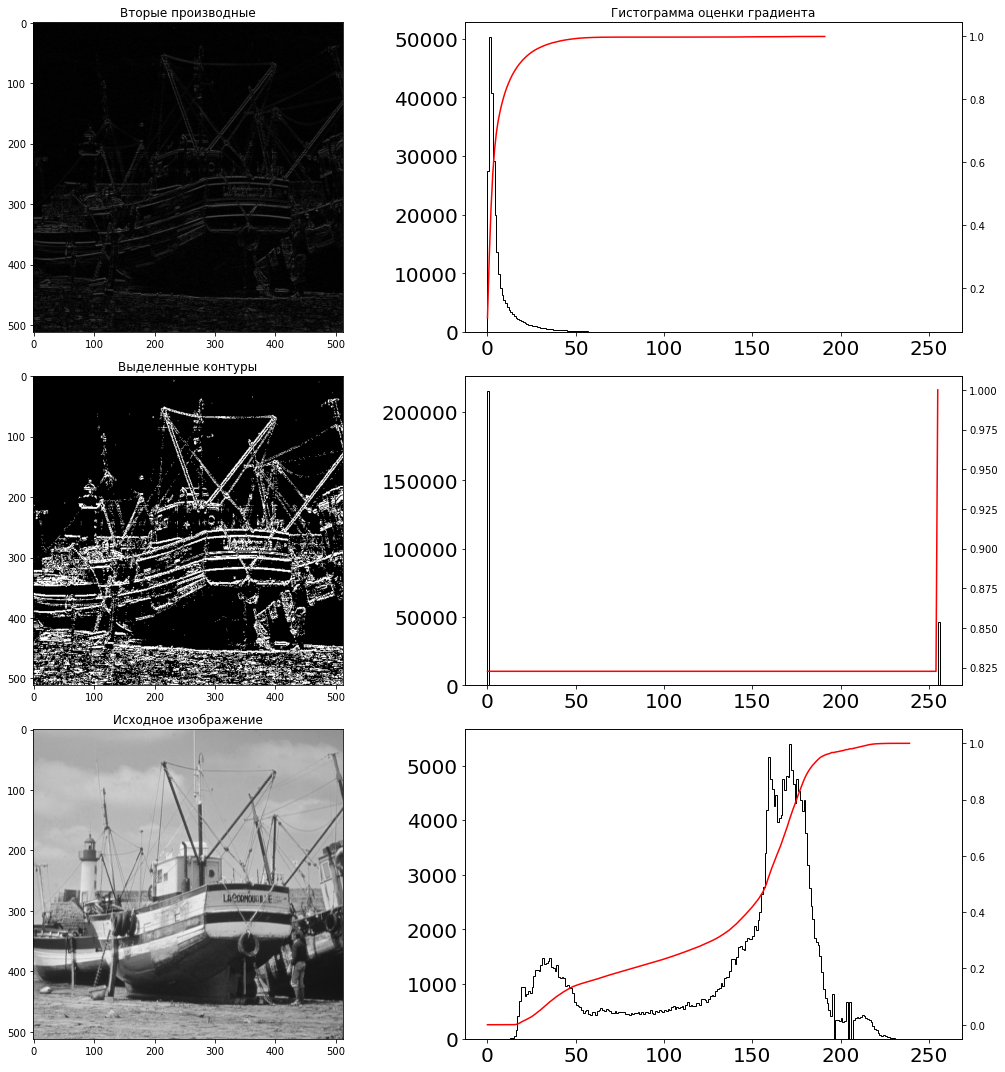

In [18]:
# применили пороговую обработку
img_with_contours_after_bound=((derivative>10)*255).astype(np.uint8)

fig = plt.figure(figsize=(15, 15))
axes=np.zeros((3,2),dtype=object)
axes[0,0]=fig.add_subplot(321)
axes[0,1]=fig.add_subplot(322)
axes[1,0]=fig.add_subplot(323)
axes[1,1]=fig.add_subplot(324)
axes[2,0]=fig.add_subplot(325)
axes[2,1]=fig.add_subplot(326)





ax_img, ax_hist, ax_cdf=plot_img_and_hist(derivative.astype(np.uint8),axes[0,:])
ax_img.set_title("Вторые производные")
ax_hist.set_title("Гистограмма оценки градиента")
ax_img, ax_hist, ax_cdf=plot_img_and_hist(img_with_contours_after_bound,axes[1,:])
ax_img.set_title("Выделенные контуры")

ax_img, ax_hist, ax_cdf=plot_img_and_hist(img,axes[2,:])
ax_img.set_title("Исходное изображение")

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()